In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("unemploy.csv")

In [4]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [5]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB


In [12]:

import matplotlib.pyplot as plt
import seaborn as sns



df.columns = df.columns.str.strip()


df['Date'] = pd.to_datetime(df['Date'].str.strip(), format='%d-%m-%Y')


print(df.isnull().sum())


df.info()



Region                                     14
Date                                       14
Frequency                                  14
Estimated Unemployment Rate (%)            14
Estimated Employed                         14
Estimated Labour Participation Rate (%)    14
Area                                       14
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour 

In [13]:

print(df.describe())


print("Regions:", df['Region'].nunique())
print("Areas:", df['Area'].unique())


print("From:", df['Date'].min(), "To:", df['Date'].max())


                                Date  Estimated Unemployment Rate (%)  \
count                            740                       740.000000   
mean   2019-12-12 18:36:58.378378496                        11.787946   
min              2019-05-31 00:00:00                         0.000000   
25%              2019-08-31 00:00:00                         4.657500   
50%              2019-11-30 00:00:00                         8.350000   
75%              2020-03-31 00:00:00                        15.887500   
max              2020-06-30 00:00:00                        76.740000   
std                              NaN                        10.721298   

       Estimated Employed  Estimated Labour Participation Rate (%)  
count        7.400000e+02                               740.000000  
mean         7.204460e+06                                42.630122  
min          4.942000e+04                                13.330000  
25%          1.190404e+06                                38.062500

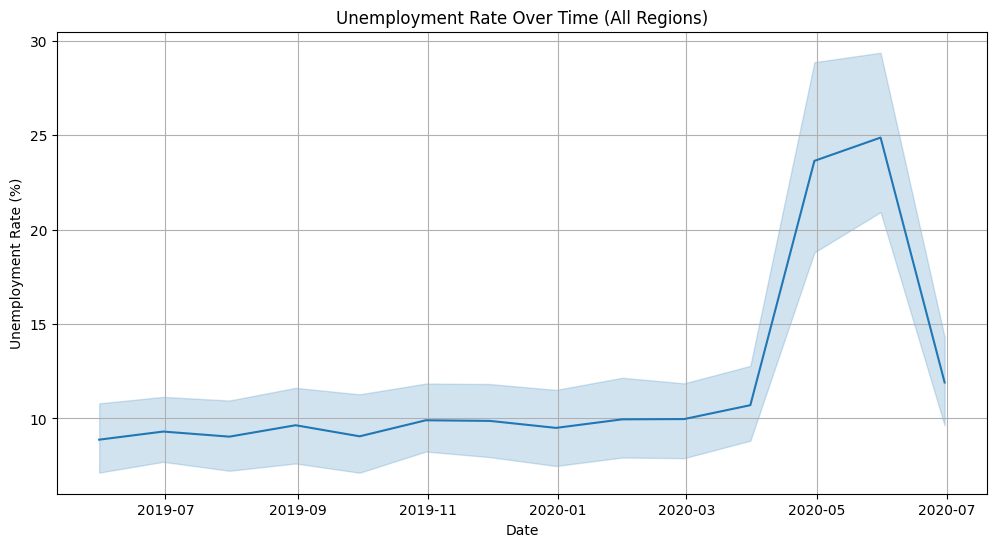

In [14]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time (All Regions)')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Date')
plt.grid(True)
plt.show()


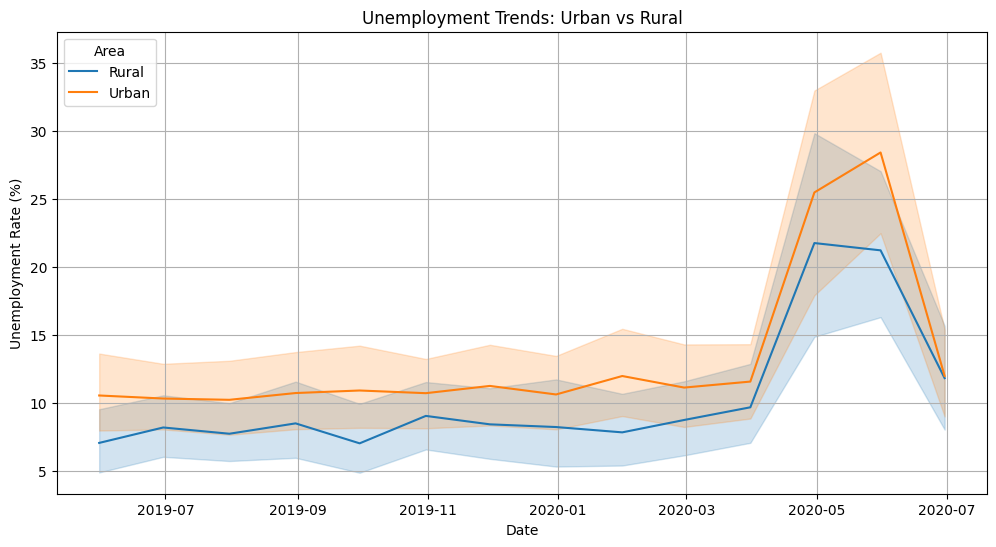

In [15]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', hue='Area')
plt.title('Unemployment Trends: Urban vs Rural')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()


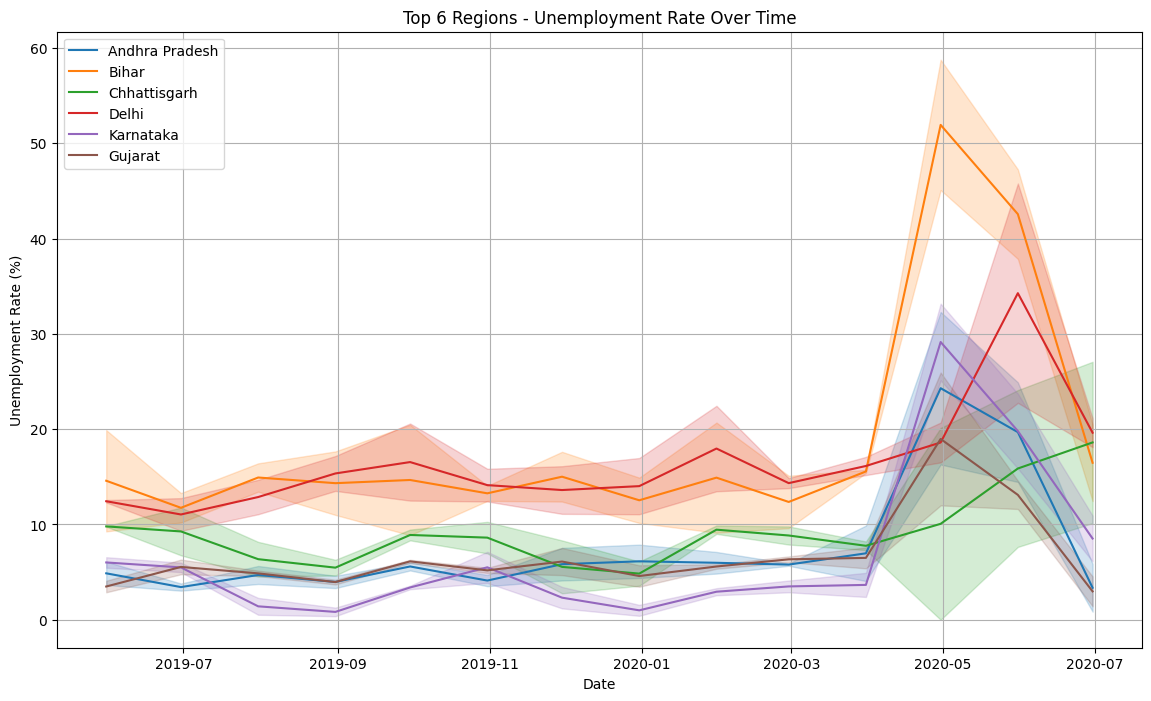

In [16]:
top_regions = df['Region'].value_counts().head(6).index
plt.figure(figsize=(14,8))
for region in top_regions:
    sub_df = df[df['Region'] == region]
    sns.lineplot(data=sub_df, x='Date', y='Estimated Unemployment Rate (%)', label=region)
plt.title('Top 6 Regions - Unemployment Rate Over Time')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.show()


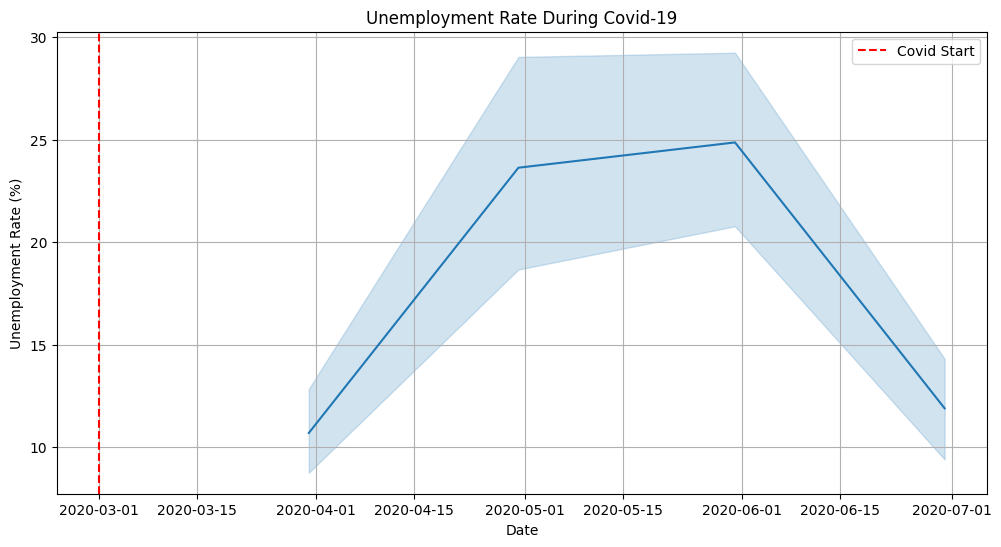

In [17]:
# Highlight time range affected by COVID-19
covid_df = df[df['Date'] >= '2020-03-01']

plt.figure(figsize=(12,6))
sns.lineplot(data=covid_df, x='Date', y='Estimated Unemployment Rate (%)')
plt.axvline(pd.to_datetime('2020-03-01'), color='red', linestyle='--', label='Covid Start')
plt.title('Unemployment Rate During Covid-19')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Maitr\AppData\Local\Temp\ipykernel_24668\2466456127.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = numeric_cols.resample('M').mean()


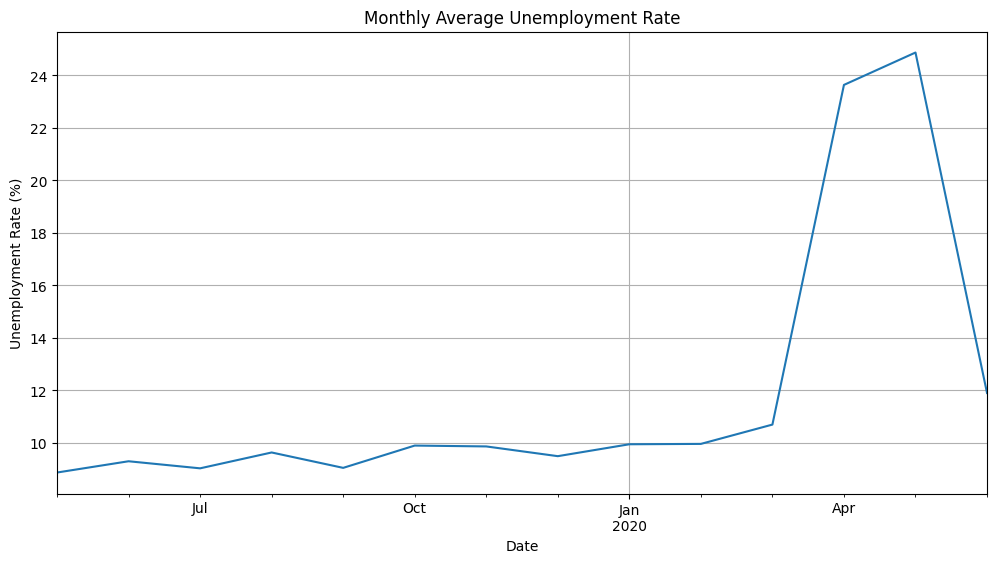

<Figure size 1200x600 with 0 Axes>

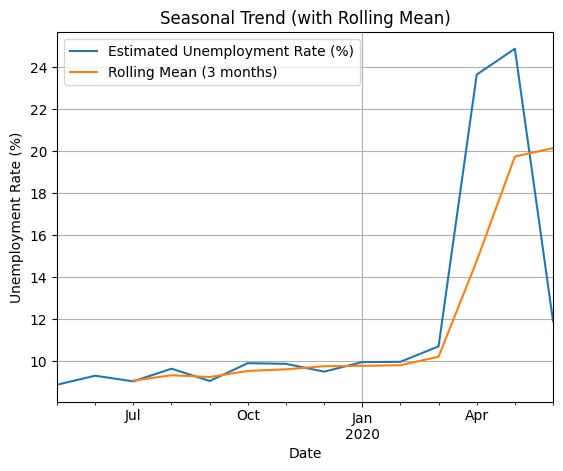

In [22]:
# Strip column names (safe to repeat)
df.columns = df.columns.str.strip()

# Correctly parse 'Date' with automatic format inference
df['Date'] = pd.to_datetime(df['Date'].astype(str).str.strip())  # No format specified

# Set Date as index
df.set_index('Date', inplace=True)

# Select only numeric columns
numeric_cols = df.select_dtypes(include='number')

# Monthly average
monthly_avg = numeric_cols.resample('M').mean()

# Plot monthly unemployment rate
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
monthly_avg['Estimated Unemployment Rate (%)'].plot()
plt.title('Monthly Average Unemployment Rate')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()

# Rolling average (3-month smoothing)
monthly_avg['Rolling Mean (3 months)'] = monthly_avg['Estimated Unemployment Rate (%)'].rolling(window=3).mean()

plt.figure(figsize=(12,6))
monthly_avg[['Estimated Unemployment Rate (%)', 'Rolling Mean (3 months)']].plot()
plt.title('Seasonal Trend (with Rolling Mean)')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()


#extra

Average Unemployment Rate Before COVID-19: 9.51%
Average Unemployment Rate During/After COVID-19: 17.78%


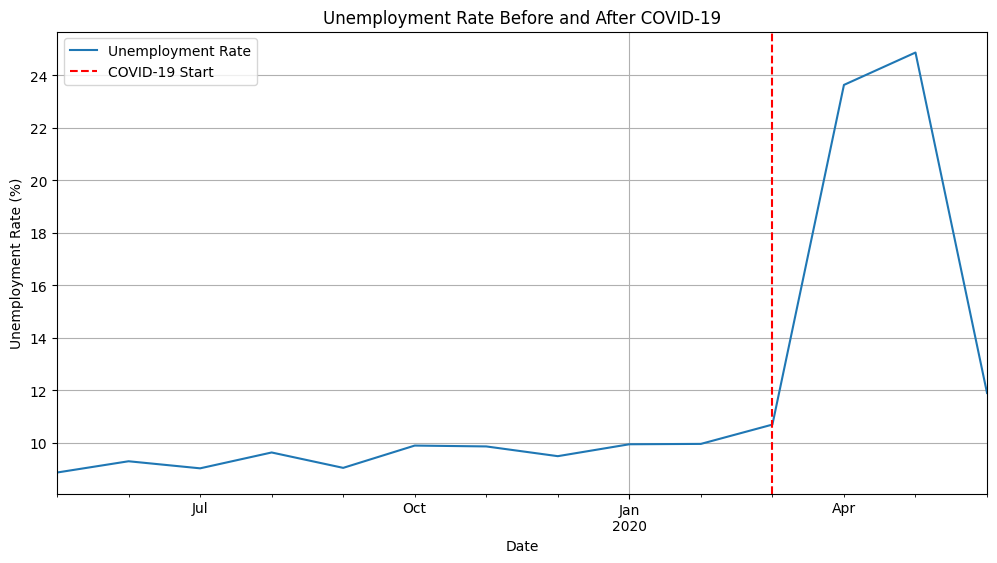

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt


pre_covid = monthly_avg[monthly_avg.index < '2020-03-01']
post_covid = monthly_avg[monthly_avg.index >= '2020-03-01']

# Compare average unemployment rates
pre_avg = pre_covid['Estimated Unemployment Rate (%)'].mean()
post_avg = post_covid['Estimated Unemployment Rate (%)'].mean()

print(f"Average Unemployment Rate Before COVID-19: {pre_avg:.2f}%")
print(f"Average Unemployment Rate During/After COVID-19: {post_avg:.2f}%")

# Visualize both periods
plt.figure(figsize=(12,6))
monthly_avg['Estimated Unemployment Rate (%)'].plot(label='Unemployment Rate')
plt.axvline(pd.to_datetime('2020-03-01'), color='red', linestyle='--', label='COVID-19 Start')
plt.title('Unemployment Rate Before and After COVID-19')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.show()


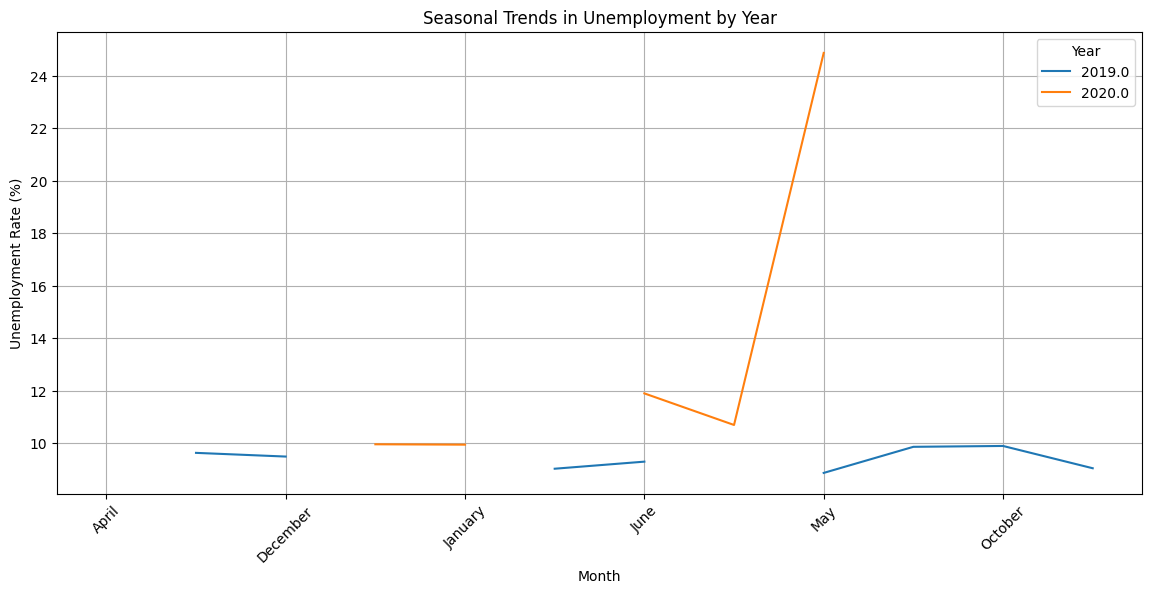

In [24]:

df['Year'] = df.index.year
df['Month'] = df.index.month_name()

# Group and visualize average unemployment by month across years
seasonal_avg = df.groupby(['Year', 'Month'])['Estimated Unemployment Rate (%)'].mean().unstack()

seasonal_avg.T.plot(figsize=(14,6))
plt.title("Seasonal Trends in Unemployment by Year")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


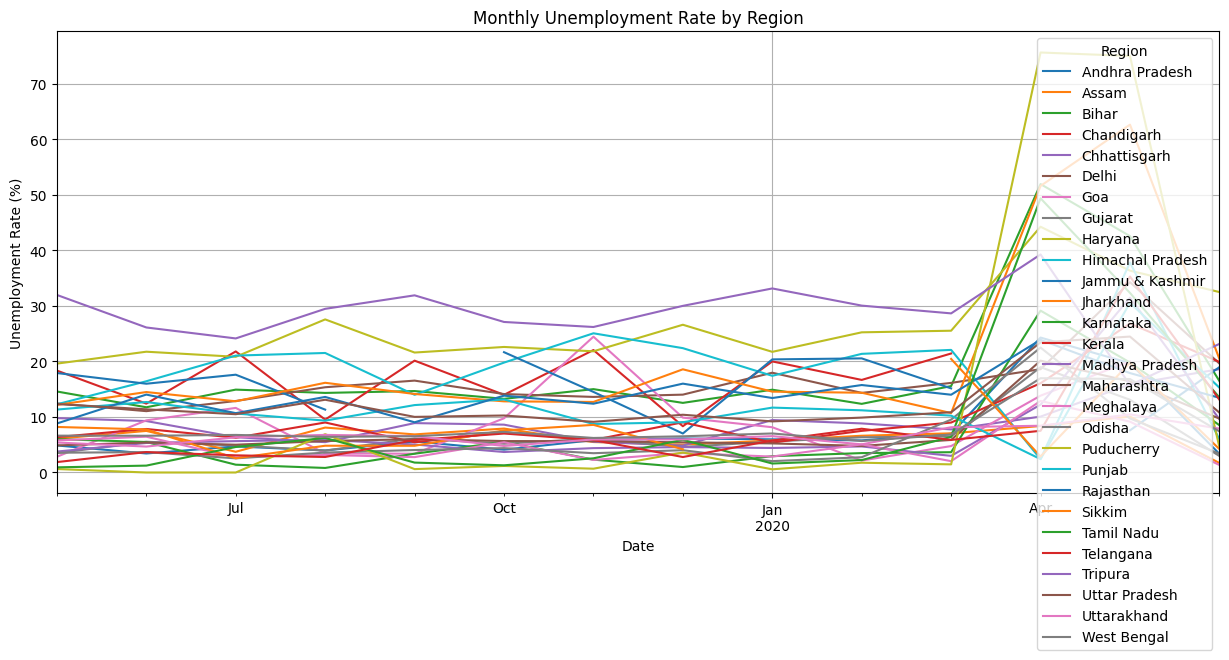

In [25]:
# (Only if 'Region' column exists)
if 'Region' in df.columns:
    region_avg = df.groupby([df.index.to_period('M'), 'Region'])['Estimated Unemployment Rate (%)'].mean().unstack()
    region_avg.index = region_avg.index.to_timestamp()

    region_avg.plot(figsize=(15,6), title="Monthly Unemployment Rate by Region")
    plt.ylabel("Unemployment Rate (%)")
    plt.grid(True)
    plt.show()
